# Принятие решений в бизнесе

**Заказчик:** интернет-магазин
    
**Цель исследования:**

- Приоритизировать гипотезы по увеличению выручки магазина, подготовленные отделом маркетинга;
- Запустить A/B-тест и проанализировать результаты.

В результате проведенного исследования будет принято одно из решений:

- Остановить тест, зафиксировать победу одной из групп;
- Остановить тест, зафиксировать отсутствие различий между группами;
- Продолжить тест.

**Входные данные:**

Список гипотез с параметрами /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные о заказах /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Данные о пользователях сайта /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_colwidth', None)

try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv', parse_dates=['date']),
        pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
)
except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv', parse_dates=['date']),
        pd.read_csv('visitors.csv', parse_dates=['date'])
)

In [3]:
def description(tables):
    for table in tables:
        table.info()
        display(table.head())
        display(table.columns)
        print('\033[1m' + 'Наличие дубликатов в таблице:' + '\033[0m')
        display(table.duplicated().sum())
        print('\033[1m' + 'Наличие пропусков в таблице:' + '\033[0m')
        display(table.isna().sum())
        print()

tables=[hypothesis, orders, visitors]

In [4]:
description(tables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

Наличие дубликатов в таблице:


0

Наличие пропусков в таблице:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Наличие дубликатов в таблице:


0

Наличие пропусков в таблице:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Index(['date', 'group', 'visitors'], dtype='object')

Наличие дубликатов в таблице:


0

Наличие пропусков в таблице:


date        0
group       0
visitors    0
dtype: int64

In [5]:
#приведем заголовки к змеиному регистру и избимся от заглавных букв
hypothesis.columns = hypothesis.columns.str.lower()

**Вывод:**
    
- Даты приведены к типу datetime;
- Заголовки столбцов датафрейма hypothesis приведены к единому стилю (избавились от заглавных букв);
- Дубликаты данных отстутсвуют;
- NULL значения отсутствуют.

Можно приступать к анализу.

### Приоритизация гипотез

Приоритезируем гипотезы методами ICE и RICE.

Фреймворк ICE состоит из трех компонентов:
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу.

ICE рассчитывается по формуле:
**Impact * Confidence / Efforts**


Фреймворк RICE, в отличие от ICE, состоит из четырех компонентов. Помимо трех вышеперечисленных в формулу добавляется параметр Reach.
- Reach — скольких пользователей затронет изменение, которое вы хотите внести.

RICE рассчитывается по формуле:
**Reach * Impact * Confidence / Efforts**

In [6]:
hypothesis['ICE'] = round(hypothesis['impact']* hypothesis['confidence']/hypothesis['efforts'],2)

In [7]:
hypothesis['RICE'] = round(hypothesis['reach']* hypothesis['impact']* hypothesis['confidence']/hypothesis['efforts'], 2)

In [8]:
hypothesis.sort_values(by=['RICE', 'ICE'], ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод:**

- Наиболее перспективные гипотезы по ICE: 8,0,7 (номера соответсвуют индексам датафрейма)
 - 8: Запустить акцию, дающую скидку на товар в день рождения;
 - 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
 - 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Наиболее перспективные гипотезы по RICE: 7,2,0,6 (номера соответсвуют индексам датафрейма)
 - 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
 - 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
 - 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
 - 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Среди лидеров по ICE и RICE две гипотезы под индексами 0 и 7.

Высокий приоритет по RICE у гипотез под индексами 2 и 6 присвоен из-за большого охвата пользователей у данных гипотез и высокого уровня уверенности в оценках. То, как много пользователей затронет гипотеза-очень значимый показатель, который необходимо учитываь при прнятии решений. Однако, уровень оценки силы влияния изменений на пользователей у данных гипотез относительно невысокий.

### Анализ A/B-теста

Для проведения А/В теста пользователи были поделены на две группы. Проверим количество уникальных пользователей в каждой тестовой группе.

In [9]:
groups = orders.groupby('group', as_index=False).agg({'visitorId':'nunique'})
groups.columns=['group', 'number_of_participants']
groups

,group,number_of_participants
0,A,503
1,B,586


В группе А на 83 пользователя меньше, чем в группе В. Разница в 15% является существенной при проведнеии А/В теста. Если группа В покажет лучшие результаты, то это может поставить под сомнение достоверность проведенного теста. Возможно придется его повторить, разделив пользователей на более равномерные группы.

In [10]:
print(f'А/B тест был проведен за период: {orders["date"].min().date()} - {orders["date"].max().date()}\nпродолжительность теста: {(orders["date"].max().date()-orders["date"].min().date()).days} дней')

А/B тест был проведен за период: 2019-08-01 - 2019-08-31
продолжительность теста: 30 дней


Проверим нет ли в тестовых группах А/B одинаковых пользователей.

In [11]:
group_A=orders[orders['group']=='A'][['group','visitorId']].drop_duplicates()
group_B=orders[orders['group']=='B'][['group','visitorId']].drop_duplicates()
all_users = pd.concat([group_A['visitorId'], group_B['visitorId']])
all_users.duplicated().sum()

58

В тестовых группах есть 58 пользователей, которые входят одновременно в группу А и в группу В. По этим пользователям невозможно оценить влияние нововведения на их покупательскую активность, поэтому целесообразно было бы исключить данных пользователей из групп до проведения А/В теста.

На этапе анализа результатов А/В теста неправильным было бы исключать этих пользователей из датафрейма orders, т.к. у нас нет возможности удалить статистику по ним из таблицы visitors (в данной таблице нет идентификатора пользователя). Если мы исключим на этапе анализа 58 пользователей из одной таблицы, но не исключим из другой, то это еще больше исказит данные. Поэтому будем проводить дальнейший анализ с учетом этих пользователей.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объединим две таблицы в одну
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


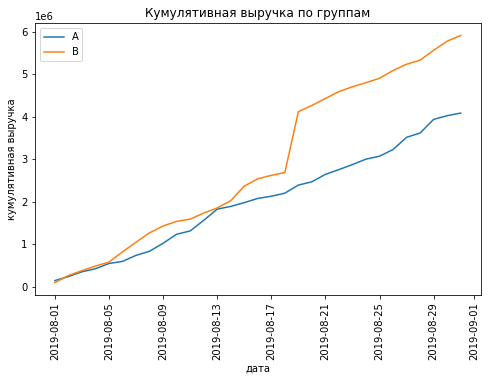

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(8, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')
plt.show()

Вырчка увеличивается в течении всего теста в двух группах. Выручка группы B выше, чем группы A,  практически на протяжении всего периода (начиная с 05.08.2019). Однако, выручка группы В растет менее равномерно, наблюдается довольно резкий рост выручки в период между 18 и 20 августа. Это может свидетельствоватьо выбросах(появлении дорогих заказов, либо увеличении числа заказов).

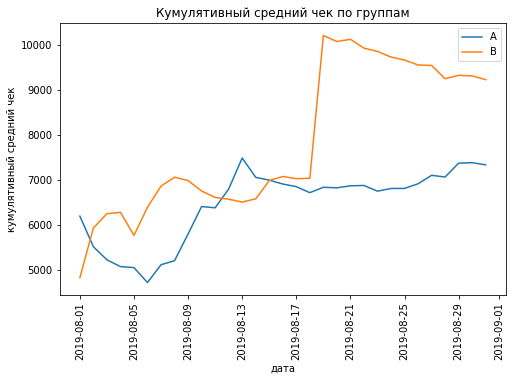

In [14]:
#Построим график кумулятивного среднего чека по группам
plt.figure(figsize=(8, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.show()

В начале периода наблюдается падение среднего чека в группе А. Однако, cредний чек для группы А становится более равномерным к концу периода. В группе В виден резкий скачек, отмеченный на предыдущем графике. Группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Либо необходимо избавиться от выбросов.

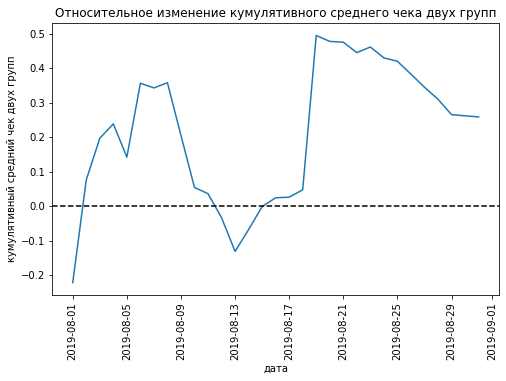

In [15]:
#Построим график относительного изменения кумулятивного среднего чека двух групп
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(8, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек двух групп')
plt.title('Относительное изменение кумулятивного среднего чека двух групп')
plt.show()

На графике наблюдаются резкие скачки, что явно свидетельствует о начилии выбросов. В начале и середине периода группа В проигрывала группе А, но на протяжении большей части времени обгоняла группу А по среднему чеку.

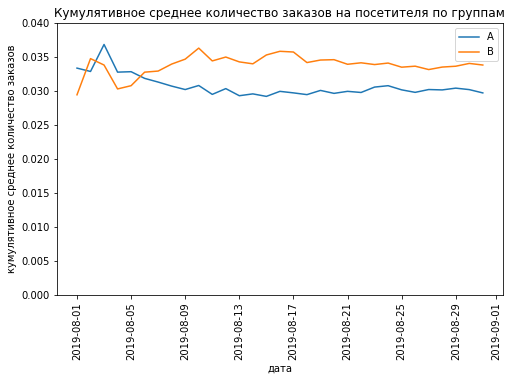

In [16]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(8, 5)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylim(0, 0.04)
plt.show()

Кумулятивное среднее количество заказов группы В стабильно выше, чем группы А. Не смотря на колебания графиков в начале и середине периода, к концу периода группы стаблизиовались.

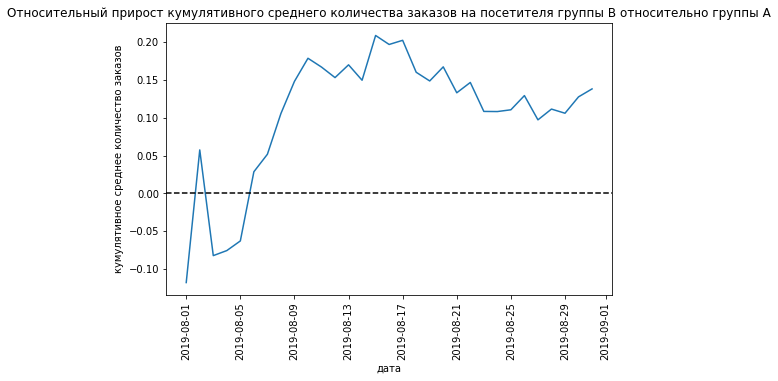

In [17]:
#Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов')
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

На пртяжении большей части периода (кроме начала) группа В лидировала по количеству заказов на посетителя.
В целом отношение среднего количества заказов на посетителя ещё не установилось (наблюдаются сильные колебания), и сейчас делать какие-либо выводы по тесту нельзя.

In [18]:
#построим точечный график количества заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsers.columns=['users', 'number_of_orders']
print(ordersByUsers.sort_values(by='number_of_orders', ascending=False).head())

           users  number_of_orders
1023  4256040402                11
591   2458001652                11
569   2378935119                 9
487   2038680547                 8
44     199603092                 5


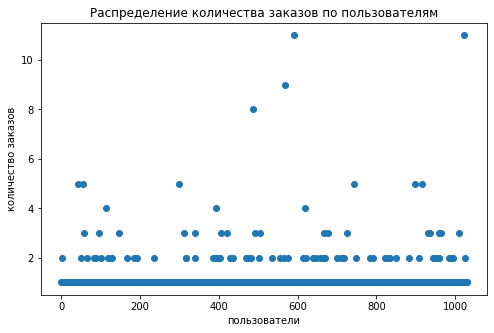

In [19]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(8, 5))
plt.scatter(x_values, ordersByUsers['number_of_orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('количество заказов')
plt.show()

Большинство покупателей сделали один заказ. Однако доля пользователей с 2-3 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

In [20]:
#посчитаем выборочные перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['number_of_orders'],[95,99])

array([2., 4.])

Не более 5% пользователей сделали больше 2 заказов и только 1% - больше 4 заказов. Возьмем 4 заказа за верхнюю границу числа заказов и отсеим аномальных пользователей по ней.

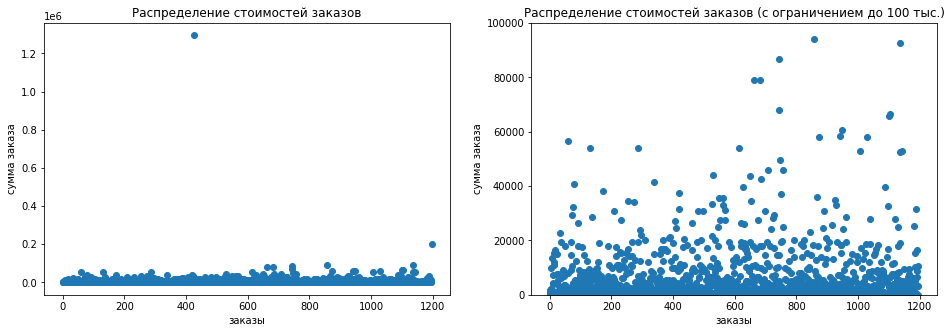

In [21]:
#построим точечный график стоимостей заказов

x_values = (range(0, len(orders['revenue'])))

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('заказы')
plt.ylabel('сумма заказа')

plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов (с ограничением до 100 тыс.)')
plt.xlabel('заказы')
plt.ylabel('сумма заказа')
plt.ylim(0, 100000)
plt.show()

На графике видно два аномально больших заказа: один - больше миллиона, второй-в районе 200 тыс. Основная доля заказов сосредоточена до 10 тыс рублей.

In [22]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Примем заказы стоиомостью выше 58233 за аномальные.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Cформулируем гипотезы.

**Нулевая:** различий в среднем количестве заказов между группами нет.

**Альтернативная:** различия в среднем между группами есть.

In [23]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# объявим переменные
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [24]:
print("p-value: ""{:.2f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительный прирост В к А: ""{:.2f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.02
относительный прирост В к А: 0.14


Первое число — p-value = 0.02 меньше, чем 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть. Данный вывод также подтвержается тем, что относительный выигрыш группы B равен 14%.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

**Нулевая гипотеза:** различий в среднем чеке между группами нет.
    
**Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

In [25]:
print("p-value: "'{:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("относительный прирост В к А: "'{:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
относительный прирост В к А: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, судя по второму занчению 25,9%, средний чек группы В значительно выше среднего чека группы А. Скорее всего дело в аномально высоких чеках группы В.

Повторим тесты на очищенных данных. Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58 233 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами.

In [26]:
usersWithManyOrders = ordersByUsers[ordersByUsers['number_of_orders']>np.percentile(ordersByUsers['number_of_orders'],99)]['users']
usersWithExpensiveOrders = orders[orders['revenue']>np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers=pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(f'Число аномальных пользователей по количеству заказов: {usersWithManyOrders.shape[0]}')
print(f'Число аномальных пользователей по сумме заказа: {usersWithExpensiveOrders.shape[0]}')
print(f'Общее число аномальных пользователей: {abnormalUsers.shape[0]}')
print(f'Доля аномальных пользователей: {abnormalUsers.shape[0]/orders["visitorId"].nunique():.2%}')

Число аномальных пользователей по количеству заказов: 10
Число аномальных пользователей по сумме заказа: 12
Общее число аномальных пользователей: 21
Доля аномальных пользователей: 2.04%


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Отличное замечание, не подумала об этом. Исправила код.*
</div>

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [28]:
print("p-value: "'{:.2f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("относительный прирост В к А: "'{0:.2f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01
относительный прирост В к А: 0.15


p-value, как и в случае с сырыми данными, меньше, чем 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть. Относительный выигрыш группы B равен 15%.

In [29]:
print(
    "p-value: "'{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительный прирост В к А: ""{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.958
относительный прирост В к А: -0.014


Как и в случае с срыми данными, P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительный проигрыш В к А незначителен 1,4%. В тесте с сырыми данными относительный прирост В к А был очень высоким. Значит дело было в аномально высоком чеке.

**Вывод:**

- Есть статистически значимое различие по среднему количеству заказов между группами, как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B значительно лучше группы A.

###  Общие выводы и рекомендации

Для проведенеия анализа были предоставлены следующие данные:
- Список гипотез с оценочными параметрами Reach, Impact, Confidence, Efforts;
- Данные о заказах;
- Данные о пользователях сайта.

**Задача:**

Принять одно из решений после проведения А/В теста:
- Остановить тест, зафиксировать победу одной из групп;
- Остановить тест, зафиксировать отсутствие различий между группами;
- Продолжить тест.

На этапе предобработки все даты были приведены к типу datetime.

**Выводы:**

- Есть статистически значимое различие по среднему количеству заказов между группами, как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B значительно лучше группы A.

**Рекомендации**:

В результате проведенных тестов было обнаружено статистически значимое различие по среднему количеству заказов между группами. Относительный выигрыш гуппы В к группе А составил 15% по сырым данным и 14% по очищенным данным. Рекомендуем остановить тест и зафиксировать победу группы В.